In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.2 MB/s 
     |████████████████████████████████| 5.3 MB 22.1 MB/s 
     |████████████████████████████████| 1.3 MB 47.6 MB/s 
     |████████████████████████████████| 163 kB 55.2 MB/s 
     |████████████████████████████████| 7.6 MB 16.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=4842ea5a099d48a9b10e69fd2ed4f07c37e34a630f4a784a6e69c55c541cb517
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/804 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/461 [00:00<?, ?B/s]

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
def save_feather(df, path="dummy.feather"):
    df = df.reset_index()
    df.to_feather(path)


def load_feather(path="dummy.feather"):
    df = pd.read_feather(path)
    df.set_index("index", inplace=True)
    df.index.name = None
    return df

In [6]:
%%time
df_vec_minilm = load_feather('/content/drive/MyDrive/123/df_vec_minilm.feather')

CPU times: user 1.44 s, sys: 2.64 s, total: 4.08 s
Wall time: 15 s


In [7]:
df_vec_minilm

,name_1,name_2,is_duplicate,name_1_vec,name_2_vec
1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,"[[-0.059349883, 0.06893618, 0.0001462776, -0.0...","[[-0.05795739, -0.028908987, -0.007804765, -0...."
2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,"[[-0.02718784, 0.003613412, -0.004286523, -0.0...","[[-0.0456158, 0.0125929965, -0.014714196, -0.0..."
3,"Rishichem Distributors Pvt., Ltd.",Dsa,0,"[[-0.029004117, 0.022043912, -0.035279945, -0....","[[-0.14760795, 0.003658777, -0.040894445, 0.02..."
4,Powermax Rubber Factory,Co. One,0,"[[-0.027730104, 0.068485916, -0.008240269, -0....","[[-0.053144608, -0.045937408, -0.055244017, 0...."
5,Tress A/S,Longyou Industries Park Zhejiang,0,"[[-0.07435113, 0.06709023, -0.027837858, -0.03...","[[0.042399086, 0.046951704, 0.08334331, -0.062..."
...,...,...,...,...,...
497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,"[[-0.032756496, 0.010041046, -0.08006657, -0.0...","[[-0.055517975, 0.02390009, 0.01811231, -0.019..."
497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,"[[-0.05821023, -0.015586115, -0.027265742, -0....","[[-0.028075648, 0.036121804, 0.018086385, -0.0..."
497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,"[[-0.07554799, 0.06064029, -0.0016463167, -0.0...","[[-0.059942964, 0.019235583, 0.015377058, 0.04..."
497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0,"[[-0.050915822, -0.0108597465, -0.023638079, 0...","[[-0.08534334, 0.024522046, 0.0145540815, -0.0..."


In [8]:
df_vec_minilm.shape[0]

497819

In [9]:
res_list = []
for index in tqdm(range(df_vec_minilm.shape[0])):
    res_list.append(cosine_similarity(df_vec_minilm['name_1_vec'].iloc[index][0].reshape(1, -1), df_vec_minilm['name_2_vec'].iloc[index][0].reshape(1, -1)))

100%|██████████| 497819/497819 [02:41<00:00, 3087.34it/s]


In [10]:
df_vec_minilm['cosine_similarity'] = res_list

In [11]:
len(res_list)

497819

In [12]:
np.mean(res_list)

0.34071952

In [13]:
df_vec_minilm[df_vec_minilm['is_duplicate']==1]['cosine_similarity'].mean()

array([[0.6276277]], dtype=float32)

In [14]:
df_vec_minilm[df_vec_minilm['is_duplicate']==0]['cosine_similarity'].mean()

array([[0.338598]], dtype=float32)

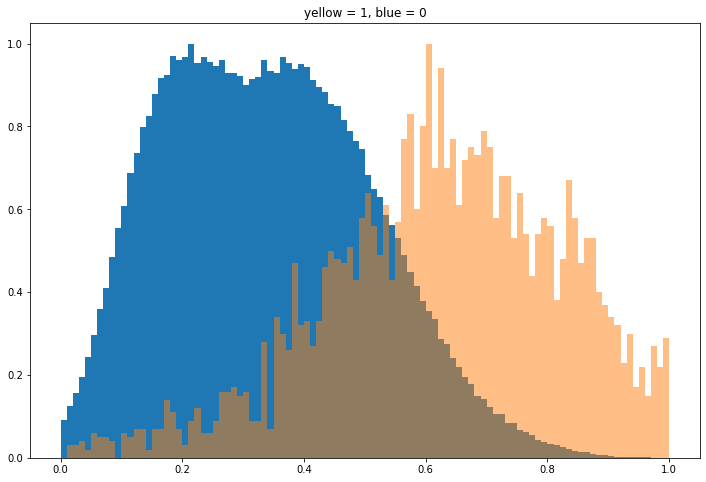

In [15]:
dist1 = df_vec_minilm[df_vec_minilm['is_duplicate']==0]['cosine_similarity']
dist2 = df_vec_minilm[df_vec_minilm['is_duplicate']==1]['cosine_similarity']

##computing the bin properties (same for both distributions)
num_bin = 100
bin_lims = np.linspace(0, 1, num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(dist1, bins=bin_lims)
hist2, _ = np.histogram(dist2, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

fig, (ax) = plt.subplots()
fig.set_size_inches(12, 8)

ax.bar(bin_centers, hist1b, width = bin_widths, align = 'center')
ax.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.5)
ax.set_title('yellow = 1, blue = 0')

plt.show()